In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import altair as alt
import numpy as np

import altair as alt

#ROW_NAMES = ['Department', 'Credit/Noncredit', '2019-20', '2020-21', '2021-22', 'Fall 2021', 'Spring 2022']

raw = pd.read_csv('FTEFtimeseries.csv')
#cols = raw.columns.drop('Department').drop('Credit/Noncredit').drop('Fall 2021').drop('Spring 2022')

dept = 'Department'
col1 = 'AY19-20'
col2 = 'AY20-21'
col3 = 'AY21-22'
cr = 'Credit/Noncredit'
reduc = 'Percent Cut'

baseline = raw['2019-20']
raw[col1] = 100
raw[col2] = raw['2020-21']/baseline * 100
raw[col3] = raw['2021-22']/baseline * 100
raw[reduc] = -(baseline - raw['2021-22'])/baseline



#differentiate between c and nc when same Department name
both_types = raw['Department'].value_counts() == 2
for dep, count in both_types.items():
    if count == True:
        raw.loc[(raw['Department'] == dep) & (raw['Credit/Noncredit'] == 'Noncredit'), 'Department'] = dep + ' '

raw1 = raw[raw['2020-21'] > 0]

raw2 = raw1[[dept, cr, reduc]]

nototal = raw2[~raw2[dept].str.contains('Total')]

nototalsort = nototal.sort_values(by=reduc)
nototalsort.shape


#clean = raw1[['Department', 'Credit/Noncredit', '2019-20', col1, col2, col3]]
#clean = clean.dropna()

        

#clean['Department'].value_counts() == 2

#alt.Chart(clean).mark_line()
#balls = 
#fig, ax = plt.subplots()
#cols = raw.columns[6:9]

#zz = raw.iloc[:, 7:10]

(67, 3)

In [5]:

subset = nototalsort
subset.loc[-1] = ['', 'Credit', 0]
subset = subset.append(raw2[raw2['Department'] == 'Total Noncredit'])
subset = subset.append(raw2[raw2['Department'] == 'Total Credit'])

colorvals = []
for index, val in subset[cr].items():
    if val == 'Credit':
        colorvals.append((1,0,0,0.3))
    else:
        colorvals.append((.27,.51,.71,1))

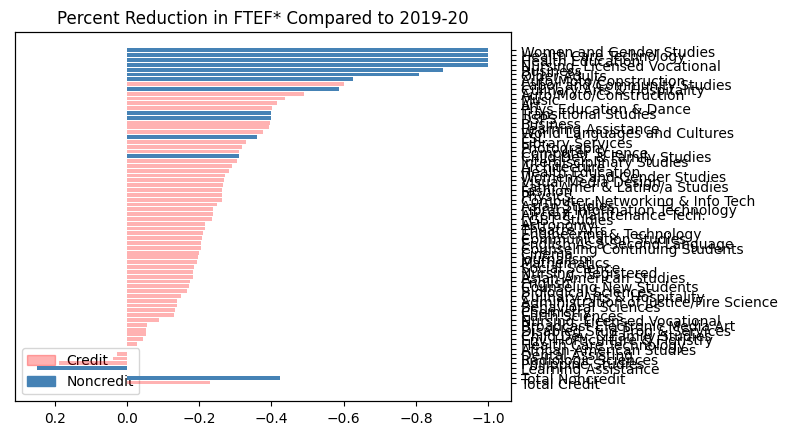

In [6]:

#subset['color'] = '#4682B4'

#subset.loc[(subset['Credit/Noncredit'] == 'Credit'), 'color'] = tuple

plt.rcdefaults()

fig, ax = plt.subplots() #figsize=(6, 12)

colors = {'Credit': (1,0,0,0.3), 'Noncredit': (.27,.51,.71,1)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower left')

ax.set_yticklabels([]) # Hide the left y-axis tick-labels
ax.set_yticks([])



ax2 = ax.twinx()
ax2.barh(subset['Department'],
         subset[reduc],
         align='center',
         ecolor='black',
         color=colorvals)
#ax.set_yticks(subset['Department'])
#ax.set_yticklabels(sort)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.invert_xaxis()

ax.yaxis.set_major_formatter(mtick.PercentFormatter(20.0))


#ax2.set_yticks(subset[reduc])
#ax2.set_yticklabels(subset['Department'])
#ax2.invert_xaxis()
#ax2.set_ylim(ax.get_ylim())
#ax.set_xlabel('Performance')
ax2.set_title('Percent Reduction in FTEF* Compared to 2019-20')

#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.rcParams["figure.figsize"] = [2 * i for i in plt.rcParams["figure.figsize"]]

plt.show()


fig.savefig('4_News_Layoffs_MullaneyMoreDepts.png', bbox_inches='tight', transparent=True)

In [216]:
subset

,Department,Credit/Noncredit,Percent Cut
14,Women and Gender Studies,Noncredit,-1.000000
7,Health Care Technology,Noncredit,-1.000000
8,Health Education,Noncredit,-1.000000
11,"Nursing, Licensed Vocational",Noncredit,-1.000000
1,Business,Noncredit,-0.875190
12,Older Adults,Noncredit,-0.807630
0,Auto/Moto/Construction,Noncredit,-0.625000
53,Labor and Community Studies,Credit,-0.600000
3,Culinary Arts & Hospitality,Noncredit,-0.586606
24,Auto/Moto/Construction,Credit,-0.489340


In [7]:
subset = nototalsort[0:33]
subset.loc[-1] = ['', 'Credit', 0]
subset = subset.append(raw2[raw2['Department'] == 'Total Noncredit'])
subset = subset.append(raw2[raw2['Department'] == 'Total Credit'])
sortlist = subset[dept].tolist()
sortlist.reverse()
chart = alt.Chart(subset).mark_bar().encode(
    x=alt.X(dept+':O', sort=sortlist, axis=alt.Axis(title=None)),
    y=alt.Y(reduc+':Q', axis=alt.Axis(format='%')), 
).encode(
    color=alt.Color(cr, legend=None),#alt.Legend(orient='bottom-right', fillColor="white", title="Course Type"))
).properties(
    title='CCSF Departmental Cuts to FTEF* in 2021-22 Initial Instructional Budget'
)

alt.concat(chart,).properties(
    title=alt.TitleParams(
        ['',
         '*Full time equivalent faculty, a standarized measure of instructor workload',
        "Percent cut based on Fall '19 and Spring '20 FTEF",
         "Chart includes top 50% of departments most reduced by cuts, 33 out of 67 departments. Totals for credit and noncredit are across all departments",
        ],
        baseline='bottom',
        orient='bottom',
        anchor='start',
        fontWeight='normal',
        fontSize=10
    )
)


/Users/annette/Projects/data_analysis/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


alt.ConcatChart(...)

In [8]:
melted = clean.melt(['Department', 'Credit/Noncredit', '2019-20'], var_name='year', value_name='FTEF') 

NameError: name 'clean' is not defined

In [121]:
sortreduc[sortreduc['Department'] == 'Total Credit']

,Department,Credit/Noncredit,2019-20,2020-21,2021-22,Fall 2021,Spring 2022,AY19-20,AY20-21,AY21-22,Percent Cut,color
15,Total Noncredit,Noncredit,245.8930,187.830,142.024,71.012,71.012,100,76.386884,57.758456,42.241544,b
86,Total Credit,Credit,1027.5872,990.797,792.089,402.290,389.799,100,96.419749,77.082412,22.917588,g


In [9]:
fig = alt.Chart(melted).mark_line(
    size=100
).encode(
    x=alt.X('year:N'),
    y=alt.Y('FTEF:Q', title='FTEF as % of AY19-20'),
    detail='Department', #group-by
        #axis=alt.Axis(format='%')),
    color=alt.Color('Credit/Noncredit'),# scale=alt.Scale(scheme='dark2')), 
        #scale=alt.Scale(domain=['Credit', 'Noncredit'])),
    size=alt.Size('2019-20', scale=alt.Scale(range=[0.5, 30]), legend=None),
    opacity=alt.value(0.5)
    # 
).properties(
    width=1000
).configure_axis(
).configure_view(
    strokeWidth=0
)
fig.display()

NameError: name 'melted' is not defined

In [342]:
histdata = clean[['Credit/Noncredit', reduc]]

,Credit/Noncredit,Percent Cut
0,Noncredit,62.500000
1,Noncredit,87.519033
2,Noncredit,31.057780
3,Noncredit,58.660604
4,Noncredit,39.926000


In [4]:
alt.Chart(histdata).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X(reduc, bin=alt.Bin(maxbins=50)),
    alt.Y('count()'),
    alt.Color('Credit/Noncredit')
)

NameError: name 'histdata' is not defined

In [17]:
raw

,Department,Credit/Noncredit,2019-20,2020-21,2021-22,Fall 2021,Spring 2022,AY19-20,AY20-21,AY21-22,Percent Cut
0,NC Auto/Moto/Construction,Noncredit,3.8400,1.680,1.440,0.72,0.720,100,43.750000,37.500000,62.500000
1,NC Business,Noncredit,16.0244,5.000,2.000,1.00,1.000,100,31.202416,12.480967,87.519033
2,NC Child Dev. & Family Studies,Noncredit,14.5049,12.000,10.000,5.00,5.000,100,82.730663,68.942220,31.057780
3,NC Culinary Arts & Hospitality,Noncredit,5.8056,2.400,2.400,1.20,1.200,100,41.339396,41.339396,58.660604
4,DSPS,Noncredit,14.6486,14.600,8.800,4.40,4.400,100,99.668228,60.074000,39.926000
...,...,...,...,...,...,...,...,...,...,...,...
82,Italian,Credit,NaN,NaN,2.000,1.00,1.000,100,NaN,NaN,NaN
83,Japanese,Credit,NaN,NaN,4.400,2.20,2.200,100,NaN,NaN,NaN
84,Russian,Credit,NaN,NaN,0.800,0.40,0.400,100,NaN,NaN,NaN
85,Spanish,Credit,NaN,NaN,8.000,4.00,4.000,100,NaN,NaN,NaN


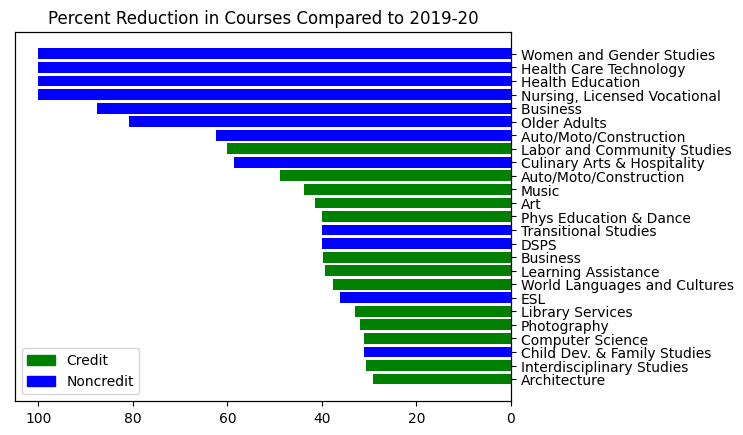

[]

In [4]:
bars = alt.Chart(subset).mark_bar().encode(
    x=reduc,
    y=alt.Y('Department:N', sort='-x')
    #color=alt.Color('Credit/Noncredit'),
)

text = bars.mark_text(
    align='left',
    #baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=reduc,
)

(bars + text).properties(height=900)

NameError: name 'subset' is not defined

alt.Chart(...)

,Department,Credit/Noncredit,2019-20,AY 19-20,AY 20-21,AY 21-22
29,Biological Sciences,Credit,40.344,100,104.1047,83.28376


NameError: name 'subs' is not defined